# Project on Bengaluru house price prediction.

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [100]:
df=pd.read_csv("C:/Users/ponna/Downloads/Bengaluru_House_Data.csv")

In [101]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [102]:
df.shape

(13320, 9)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.6+ KB


In [104]:
df1=df.drop(["area_type","society","balcony"],axis=1)

In [105]:
df1.head()

,availability,location,size,total_sqft,bath,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00


In [106]:
df1.isnull().sum()

availability     0
location         1
size            16
total_sqft       0
bath            73
price            0
dtype: int64

In [107]:
df2=df1.dropna()

In [108]:
df2.isnull().sum()

availability    0
location        0
size            0
total_sqft      0
bath            0
price           0
dtype: int64

In [109]:
df2.shape

(13246, 6)

In [110]:
df2.head()

,availability,location,size,total_sqft,bath,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00


In [111]:
df2.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '18-Jan', '20-Mar', '17-Dec',
       '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb', '19-May',
       '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan',
       '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
       '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun', '17-Feb',
       '20-Nov', '20-Jul', '16-Sep', '15-Oct', '20-Feb', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [112]:
df2.groupby("availability")["availability"].count()

availability
14-Jul               1
14-Nov               1
15-Aug               1
15-Dec               1
15-Jun               1
15-Nov               2
15-Oct               2
16-Dec               4
16-Jan               1
16-Jul               1
16-Mar               3
16-Nov               1
16-Oct               1
16-Sep               2
17-Apr               7
17-Aug               9
17-Dec              29
17-Feb               2
17-Jan               1
17-Jul              12
17-Jun              13
17-Mar               5
17-May               8
17-Nov              12
17-Oct              21
17-Sep              11
18-Apr             269
18-Aug             200
18-Dec             297
18-Feb              62
                 ...  
20-Apr               4
20-Aug              16
20-Dec              98
20-Feb               1
20-Jan              24
20-Jul               5
20-Jun              11
20-Mar               2
20-May               4
20-Nov               4
20-Oct               7
20-Sep               

In [113]:
df2["availability"]=df["availability"].apply(lambda x:x if x in("Ready To Move") else "Future date")

C:\Users\ponna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
df2.head()

,availability,location,size,total_sqft,bath,price
0,Future date,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00


In [115]:
df2.groupby("availability")["availability"].count()

availability
Future date       2682
Ready To Move    10564
Name: availability, dtype: int64

In [116]:
df2.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [117]:
df2.groupby("location")["location"].count().sort_values(ascending=False)

location
Whitefield                                      534
Sarjapur  Road                                  392
Electronic City                                 302
Kanakpura Road                                  266
Thanisandra                                     233
Yelahanka                                       210
Uttarahalli                                     186
Hebbal                                          176
Marathahalli                                    175
Raja Rajeshwari Nagar                           171
Bannerghatta Road                               152
Hennur Road                                     150
7th Phase JP Nagar                              149
Haralur Road                                    141
Electronic City Phase II                        131
Rajaji Nagar                                    106
Chandapura                                       98
Bellandur                                        96
KR Puram                                         88
Hoo

In [118]:
locations=df2.groupby("location")["location"].count().sort_values()

In [119]:
locations

location
 Anekal                                           1
Kengeri Satellite Town Stage II                   1
Kirloskar layout, Basaveshwarnagar                1
Kodanda Reddy Layout                              1
Konappana Agrahara                                1
Kudlu Village,                                    1
Kumbhena Agrahara                                 1
Kuvempu Layout                                    1
LIC Colony                                        1
Lakkasandra Extension                             1
Lakshminarayanapura, Electronic City Phase 2      1
Lakshmipura Vidyaanyapura                         1
Lalbagh Road                                      1
Laxminarayana Layout                              1
M C Layout                                        1
M.G Road                                          1
MEI layout, Bagalgunte                            1
MM Layout                                         1
Kengeri Satellite Town KHB Apartment              1
Ken

In [120]:
loc20=locations[locations<=20]

In [121]:
loc20

location
 Anekal                                          1
Kengeri Satellite Town Stage II                  1
Kirloskar layout, Basaveshwarnagar               1
Kodanda Reddy Layout                             1
Konappana Agrahara                               1
Kudlu Village,                                   1
Kumbhena Agrahara                                1
Kuvempu Layout                                   1
LIC Colony                                       1
Lakkasandra Extension                            1
Lakshminarayanapura, Electronic City Phase 2     1
Lakshmipura Vidyaanyapura                        1
Lalbagh Road                                     1
Laxminarayana Layout                             1
M C Layout                                       1
M.G Road                                         1
MEI layout, Bagalgunte                           1
MM Layout                                        1
Kengeri Satellite Town KHB Apartment             1
Kengeri Satellite Town

In [122]:
df2.location=df2["location"].apply(lambda x:"Others" if x in loc20 else x)

C:\Users\ponna\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [123]:
df2.location.unique()

array(['Electronic City Phase II', 'Others', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', '7th Phase JP Nagar', 'Gottigere',
       'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Thanisandra', 'Bellandur',
       'Electronic City', 'Ramagondanahalli', 'Yelahanka', 'Hebbal',
       'Kanakpura Road', 'Electronics City Phase 1', 'Kundalahalli',
       'Chikkalasandra', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Hegde Nagar', 'Haralur Road',
       'Hennur Road', 'Kothannur', 'Kalena Agrahara', 'Kaval Byrasandra',
       'EPIP Zone', 'Kasavanhalli', 'Domlur', 'Yeshwanthpur',
       'Chandapura', 'Nagarbhavi', 'Devanahalli', 'Ramamurthy Nagar',
       'Malleshwaram', 'Akshaya Nagar', 'Kadugodi', 'Hormavu',
       'Kudlu Gate', '8th Phase JP Nagar',

In [124]:
df2.groupby("location")["location"].count().sort_values(ascending=False)

location
Others                         4314
Whitefield                      534
Sarjapur  Road                  392
Electronic City                 302
Kanakpura Road                  266
Thanisandra                     233
Yelahanka                       210
Uttarahalli                     186
Hebbal                          176
Marathahalli                    175
Raja Rajeshwari Nagar           171
Bannerghatta Road               152
Hennur Road                     150
7th Phase JP Nagar              149
Haralur Road                    141
Electronic City Phase II        131
Rajaji Nagar                    106
Chandapura                       98
Bellandur                        96
Hoodi                            88
KR Puram                         88
Electronics City Phase 1         87
Yeshwanthpur                     85
Begur Road                       84
Sarjapur                         81
Harlur                           79
Kasavanhalli                     79
Hormavu            

In [125]:
df2.head()

,availability,location,size,total_sqft,bath,price
0,Future date,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Ready To Move,Others,4 Bedroom,2600,5.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00


In [126]:
df2.shape

(13246, 6)

In [127]:
df2.location.unique().shape

(144,)

In [128]:
import re
df2["bhk"]=df2["size"].apply(lambda x: int(re.findall('\d+',x)[0].strip()))

C:\Users\ponna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [129]:
df2.head()

,availability,location,size,total_sqft,bath,price,bhk
0,Future date,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Ready To Move,Others,4 Bedroom,2600,5.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00,2


In [130]:
df2["total_sqft"].unique

<bound method Series.unique of 0               1056
1               2600
2               1440
3               1521
4               1200
5               1170
6               2732
7               3300
8               1310
9               1020
10              1800
11              2785
12              1000
13              1100
14              2250
15              1175
16              1180
17              1540
18              2770
19              1100
20               600
21              1755
22              2800
23              1767
24               510
25              1250
26               660
27              1610
28              1151
29              1025
            ...     
13290           4050
13291            812
13292           1440
13293           2425
13294           2200
13295           1810
13296           1200
13297           1060
13298           1015
13299    2830 - 2882
13300           1500
13301           1454
13302           1075
13303            774
13304           1187
133

In [131]:
def get_mean(x):
    if re.findall('-',x):
        ss = x.strip().split('-')
        return ((float(ss[0])+float(ss[0]))/2)
    try:
        return float(x.strip())
    except:
        return None

In [132]:
df2["new_total_sqft"]=df2["total_sqft"].apply(get_mean)

C:\Users\ponna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [133]:
df2.head()

,availability,location,size,total_sqft,bath,price,bhk,new_total_sqft
0,Future date,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Ready To Move,Others,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0


In [134]:
df2.new_total_sqft.unique

<bound method Series.unique of 0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
5        1170.0
6        2732.0
7        3300.0
8        1310.0
9        1020.0
10       1800.0
11       2785.0
12       1000.0
13       1100.0
14       2250.0
15       1175.0
16       1180.0
17       1540.0
18       2770.0
19       1100.0
20        600.0
21       1755.0
22       2800.0
23       1767.0
24        510.0
25       1250.0
26        660.0
27       1610.0
28       1151.0
29       1025.0
          ...  
13290    4050.0
13291     812.0
13292    1440.0
13293    2425.0
13294    2200.0
13295    1810.0
13296    1200.0
13297    1060.0
13298    1015.0
13299    2830.0
13300    1500.0
13301    1454.0
13302    1075.0
13303     774.0
13304    1187.0
13305     500.0
13306    1200.0
13307    1805.0
13308    1527.0
13309    1675.0
13310    1050.0
13311    1500.0
13312    1262.0
13313    1345.0
13314    1715.0
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319    

In [135]:
df2.isnull().sum()

availability       0
location           0
size               0
total_sqft         0
bath               0
price              0
bhk                0
new_total_sqft    46
dtype: int64

In [136]:
df3=df2.dropna()

In [137]:
df3.isnull().sum()

availability      0
location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
new_total_sqft    0
dtype: int64

In [138]:
df3.shape

(13200, 8)

In [139]:
df3.bath.unique

<bound method Series.unique of 0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
5        2.0
6        4.0
7        4.0
8        3.0
9        6.0
10       2.0
11       5.0
12       2.0
13       2.0
14       3.0
15       2.0
16       3.0
17       3.0
18       4.0
19       2.0
20       1.0
21       3.0
22       5.0
23       3.0
24       1.0
25       3.0
26       1.0
27       3.0
28       2.0
29       2.0
        ... 
13290    2.0
13291    1.0
13292    2.0
13293    5.0
13294    3.0
13295    3.0
13296    2.0
13297    2.0
13298    2.0
13299    5.0
13300    6.0
13301    3.0
13302    2.0
13303    5.0
13304    2.0
13305    1.0
13306    5.0
13307    3.0
13308    3.0
13309    3.0
13310    2.0
13311    9.0
13312    2.0
13313    2.0
13314    3.0
13315    4.0
13316    5.0
13317    2.0
13318    4.0
13319    1.0
Name: bath, Length: 13200, dtype: float64>

In [140]:
df3.groupby("bath")["bath"].count().sort_values(ascending=False)

bath
2.0     6893
3.0     3274
4.0     1222
1.0      781
5.0      521
6.0      269
7.0      102
8.0       64
9.0       41
10.0      13
12.0       7
11.0       3
13.0       3
16.0       2
27.0       1
14.0       1
15.0       1
18.0       1
40.0       1
Name: bath, dtype: int64

In [141]:
df4=df3[df3["bath"]<=10]

In [142]:
df4.bath.unique

<bound method Series.unique of 0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
5        2.0
6        4.0
7        4.0
8        3.0
9        6.0
10       2.0
11       5.0
12       2.0
13       2.0
14       3.0
15       2.0
16       3.0
17       3.0
18       4.0
19       2.0
20       1.0
21       3.0
22       5.0
23       3.0
24       1.0
25       3.0
26       1.0
27       3.0
28       2.0
29       2.0
        ... 
13290    2.0
13291    1.0
13292    2.0
13293    5.0
13294    3.0
13295    3.0
13296    2.0
13297    2.0
13298    2.0
13299    5.0
13300    6.0
13301    3.0
13302    2.0
13303    5.0
13304    2.0
13305    1.0
13306    5.0
13307    3.0
13308    3.0
13309    3.0
13310    2.0
13311    9.0
13312    2.0
13313    2.0
13314    3.0
13315    4.0
13316    5.0
13317    2.0
13318    4.0
13319    1.0
Name: bath, Length: 13180, dtype: float64>

In [143]:
df4.groupby("bath")["bath"].count().sort_values(ascending=False)

bath
2.0     6893
3.0     3274
4.0     1222
1.0      781
5.0      521
6.0      269
7.0      102
8.0       64
9.0       41
10.0      13
Name: bath, dtype: int64

In [144]:
df4.shape

(13180, 8)

In [145]:
df4.isnull().sum()

availability      0
location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
new_total_sqft    0
dtype: int64

In [146]:
df4.head()

,availability,location,size,total_sqft,bath,price,bhk,new_total_sqft
0,Future date,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Ready To Move,Others,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0


In [147]:
df5=df4.drop(["size","total_sqft"],axis=1)

In [148]:
df5.head()

,availability,location,bath,price,bhk,new_total_sqft
0,Future date,Electronic City Phase II,2.0,39.07,2,1056.0
1,Ready To Move,Others,5.0,120.00,4,2600.0
2,Ready To Move,Uttarahalli,2.0,62.00,3,1440.0
3,Ready To Move,Lingadheeranahalli,3.0,95.00,3,1521.0
4,Ready To Move,Kothanur,2.0,51.00,2,1200.0


In [149]:
df5[df5["new_total_sqft"]/df5["bhk"]<400]

,availability,location,bath,price,bhk,new_total_sqft
9,Ready To Move,Others,6.0,370.00,6,1020.0
16,Ready To Move,Bisuvanahalli,3.0,48.00,3,1180.0
26,Ready To Move,Electronic City,1.0,23.10,2,660.0
29,Ready To Move,Electronic City,2.0,47.00,3,1025.0
31,Ready To Move,Bisuvanahalli,2.0,35.00,3,1075.0
35,Future date,Kanakpura Road,2.0,36.00,2,700.0
45,Ready To Move,HSR Layout,9.0,200.00,8,600.0
58,Ready To Move,Others,4.0,150.00,6,1407.0
64,Ready To Move,Bommanahalli,8.0,140.00,8,3000.0
68,Ready To Move,Others,7.0,85.00,8,1350.0


In [150]:
df6=df5[df5["new_total_sqft"]/df5["bhk"]>400]

In [151]:
df6.head()

,availability,location,bath,price,bhk,new_total_sqft
0,Future date,Electronic City Phase II,2.0,39.07,2,1056.0
1,Ready To Move,Others,5.0,120.00,4,2600.0
2,Ready To Move,Uttarahalli,2.0,62.00,3,1440.0
3,Ready To Move,Lingadheeranahalli,3.0,95.00,3,1521.0
4,Ready To Move,Kothanur,2.0,51.00,2,1200.0


In [152]:
df6.shape

(11446, 6)

In [153]:
df6["price_per_sqft"]=df6["price"]*100000/df6["new_total_sqft"]

C:\Users\ponna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [154]:
df6.head()

,availability,location,bath,price,bhk,new_total_sqft,price_per_sqft
0,Future date,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Ready To Move,Others,5.0,120.00,4,2600.0,4615.384615
2,Ready To Move,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Ready To Move,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Ready To Move,Kothanur,2.0,51.00,2,1200.0,4250.000000


In [155]:
df6["price_per_sqft"].describe()

count     11446.000000
mean       6131.272179
std        3932.982959
min         267.829813
25%        4202.938655
50%        5263.157895
75%        6768.855941
max      176470.588235
Name: price_per_sqft, dtype: float64

In [156]:
#df6["location"].unique()
df6.groupby("location").count()

,availability,bath,price,bhk,new_total_sqft,price_per_sqft
location,,,,,,
1st Phase JP Nagar,21,21,21,21,21,21
2nd Stage Nagarbhavi,3,3,3,3,3,3
5th Phase JP Nagar,34,34,34,34,34,34
6th Phase JP Nagar,20,20,20,20,20,20
7th Phase JP Nagar,141,141,141,141,141,141
8th Phase JP Nagar,47,47,47,47,47,47
9th Phase JP Nagar,33,33,33,33,33,33
Abbigere,16,16,16,16,16,16
Akshaya Nagar,58,58,58,58,58,58


In [157]:
df6.price_per_sqft.describe()

count     11446.000000
mean       6131.272179
std        3932.982959
min         267.829813
25%        4202.938655
50%        5263.157895
75%        6768.855941
max      176470.588235
Name: price_per_sqft, dtype: float64

In [158]:
def rmv_price_outlier(df):
    df_new=pd.DataFrame()
    for key,sdf in df.groupby("location"):
        m=sdf["price_per_sqft"].mean()
        s=sdf["price_per_sqft"].std()
        rdf=sdf[(sdf["price_per_sqft"]<=m+s)&(sdf["price_per_sqft"]>=m-s)]
        df_new=pd.concat([df_new,rdf],ignore_index=True)
    return df_new
        

In [159]:
df7=rmv_price_outlier(df6)

In [160]:
df7

,availability,location,bath,price,bhk,new_total_sqft,price_per_sqft
0,Ready To Move,1st Phase JP Nagar,4.0,250.00,4,2825.0,8849.557522
1,Ready To Move,1st Phase JP Nagar,3.0,167.00,3,1875.0,8906.666667
2,Ready To Move,1st Phase JP Nagar,4.0,210.00,3,2065.0,10169.491525
3,Ready To Move,1st Phase JP Nagar,3.0,157.00,3,2024.0,7756.916996
4,Ready To Move,1st Phase JP Nagar,3.0,225.00,3,2059.0,10927.634774
5,Ready To Move,1st Phase JP Nagar,2.0,100.00,2,1394.0,7173.601148
6,Future date,1st Phase JP Nagar,2.0,93.00,2,1077.0,8635.097493
7,Ready To Move,1st Phase JP Nagar,2.0,180.00,2,1566.0,11494.252874
8,Ready To Move,1st Phase JP Nagar,2.0,50.00,1,840.0,5952.380952
9,Future date,1st Phase JP Nagar,3.0,131.00,3,1590.0,8238.993711


In [161]:
df6.shape

(11446, 7)

In [162]:
df7.shape

(9512, 7)

In [163]:
df6.head()

,availability,location,bath,price,bhk,new_total_sqft,price_per_sqft
0,Future date,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Ready To Move,Others,5.0,120.00,4,2600.0,4615.384615
2,Ready To Move,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Ready To Move,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Ready To Move,Kothanur,2.0,51.00,2,1200.0,4250.000000


In [164]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9512 entries, 0 to 9511
Data columns (total 7 columns):
availability      9512 non-null object
location          9512 non-null object
bath              9512 non-null float64
price             9512 non-null float64
bhk               9512 non-null int64
new_total_sqft    9512 non-null float64
price_per_sqft    9512 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 520.3+ KB


In [165]:
availabilty_dummy=pd.get_dummies(df7["availability"],drop_first=True)

In [166]:
availabilty_dummy

,Ready To Move
0,1
1,1
2,1
3,1
4,1
5,1
6,0
7,1
8,1
9,0


In [167]:
location_dummies=pd.get_dummies(df7["location"],drop_first=True)

In [168]:
location_dummies

,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
df8=pd.concat([df7,availabilty_dummy,location_dummies],axis=1)

In [170]:
df8

,availability,location,bath,price,bhk,new_total_sqft,price_per_sqft,Ready To Move,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Ready To Move,1st Phase JP Nagar,4.0,250.00,4,2825.0,8849.557522,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ready To Move,1st Phase JP Nagar,3.0,167.00,3,1875.0,8906.666667,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ready To Move,1st Phase JP Nagar,4.0,210.00,3,2065.0,10169.491525,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ready To Move,1st Phase JP Nagar,3.0,157.00,3,2024.0,7756.916996,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ready To Move,1st Phase JP Nagar,3.0,225.00,3,2059.0,10927.634774,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Ready To Move,1st Phase JP Nagar,2.0,100.00,2,1394.0,7173.601148,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Future date,1st Phase JP Nagar,2.0,93.00,2,1077.0,8635.097493,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Ready To Move,1st Phase JP Nagar,2.0,180.00,2,1566.0,11494.252874,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Ready To Move,1st Phase JP Nagar,2.0,50.00,1,840.0,5952.380952,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Future date,1st Phase JP Nagar,3.0,131.00,3,1590.0,8238.993711,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
df9=df8.drop(["availability","location","price_per_sqft"],axis=1)

In [172]:
df9.head()

,bath,price,bhk,new_total_sqft,Ready To Move,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,4.0,250.0,4,2825.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,167.0,3,1875.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,210.0,3,2065.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,157.0,3,2024.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,225.0,3,2059.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
X=df9.drop(["price"],axis=1)
y=df9.price

In [174]:
y.head()

0    250.0
1    167.0
2    210.0
3    157.0
4    225.0
Name: price, dtype: float64

In [175]:
#from sklearn.model_selection import train_test_spilt
#X_train,X_test,y_train,y_test=train_test_spilt(X,y,test_size=0.2,random_state=0)
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2, random_state=0)

In [176]:
len(X_train)

7609

In [177]:
len(X_test)

1903

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [191]:
model_score=cross_val_score(estimator=LinearRegression(),X=X_train,y=y_train,cv=5)
model_score

array([ 8.76870874e-01,  8.25709465e-01, -4.31337682e+14,  7.98776726e-01,
        7.53780768e-01])

In [192]:
model_score.mean()

-86267536300149.5

In [193]:
model_score.std()

172535072600300.62

In [194]:
model_score=cross_val_score(estimator=DecisionTreeRegressor(),X=X_train,y=y_train,cv=5)
model_score

array([0.8541614 , 0.68271576, 0.62020195, 0.72953641, 0.39850034])

In [195]:
model_score.mean()

0.6570231710293639

In [196]:
model_score.std()

0.15031408246076786

In [199]:
model_dt=DecisionTreeRegressor()
dt=model_dt.fit(X_train,y_train)

In [201]:
dt.predict(X_test[:5])

array([ 38.5       , 210.        ,  87.57666667,  56.9408    ,
       200.        ])

In [204]:
y_test

2931     55.00
6092    142.00
2381     97.00
5981     55.00
5747     59.00
3629     38.60
4936     36.00
1997     46.00
2846     55.00
6008     80.00
519      34.77
1607     38.12
4310     48.00
3955    140.00
154     108.00
6003     43.00
7903     83.00
8830     95.00
692      85.00
1067     60.00
4265    100.00
776      82.89
7177     78.00
4625    160.00
6836     50.00
9159     36.00
8937     45.00
7437     60.00
7014     32.00
5094     40.00
         ...  
7823     17.09
9458    100.00
5470     79.00
8936    280.00
9255    213.00
6778    150.00
8382    129.00
7180     57.00
4695     63.00
4589     75.00
8163     55.00
4156    191.00
9229    110.00
1002     35.23
181     115.00
2529     75.00
1750     46.00
8355     98.00
8818     60.00
2958     44.00
5480     75.00
8969    224.00
2104     78.00
6606     50.00
5007     22.80
5733     52.50
5783     48.00
3335     60.90
8971     44.90
8261    100.00
Name: price, Length: 1903, dtype: float64

In [207]:
model_lr=LinearRegression()
lr=model_lr.fit(X_train,y_train)

In [209]:
lr.predict(X_test[:5])

array([ 52.87566265, 134.24182333,  79.37398395,  61.84982187,
       131.32980187])

In [210]:
dt.predict(X_test[:5])

array([ 38.5       , 210.        ,  87.57666667,  56.9408    ,
       200.        ])

In [211]:
y_test.head()

2931     55.0
6092    142.0
2381     97.0
5981     55.0
5747     59.0
Name: price, dtype: float64

In [212]:
prediction=dt.predict(X_test)

In [213]:
prediction

array([ 38.5       , 210.        ,  87.57666667, ...,  62.024     ,
        49.        , 126.        ])

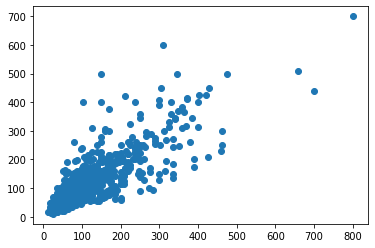

In [214]:
plt.scatter(prediction,y_test)